In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
import itertools

In [362]:
from imblearn.over_sampling import SMOTE

In [363]:
df = pd.read_csv('Master_Clean.csv', index_col=0)

In [364]:
df.head()

,SEQN,Age,Heart_Rate,Irregular_Pulse,Systolic_BP_Avg,Diastolic_BP_Avg,Weight_kg,Height_cm,BMI,Waist_cm,...,Family_Income_5.0,Family_Income_6.0,Family_Income_7.0,Family_Income_8.0,Family_Income_9.0,Family_Income_10.0,Family_Income_12.0,Family_Income_13.0,Family_Income_14.0,Family_Income_15.0
0,83732.0,62.0,76.0,0.0,122.666667,65.333333,94.8,184.5,27.8,101.1,...,0,0,0,0,0,1,0,0,0,0
1,83733.0,53.0,72.0,0.0,140.000000,86.000000,90.4,171.4,30.8,107.9,...,0,0,0,0,0,0,0,0,0,0
2,83735.0,56.0,78.0,0.0,134.000000,70.000000,109.8,160.9,42.4,110.1,...,0,0,0,0,0,1,0,0,0,0
3,83736.0,42.0,76.0,0.0,104.000000,60.000000,55.2,164.9,20.3,80.4,...,0,0,1,0,0,0,0,0,0,0
4,83741.0,22.0,66.0,0.0,111.333333,72.666667,76.6,165.4,28.0,86.6,...,0,0,1,0,0,0,0,0,0,0


In [311]:
df.shape

(4423, 64)

In [312]:
df_target = df['Target']

In [313]:
df_features = df.drop(columns=['SEQN', 'Target'])

In [314]:
df_features.shape

(4423, 62)

In [315]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=123)

In [316]:
sum(df_target==1)

80

In [317]:
sum(df_target==0)

4343

In [318]:
sum(y_train==0)

3473

In [319]:
sum(y_train==1)

65

In [320]:
sm = SMOTE(random_state=123)

In [322]:
X_train, y_train = sm.fit_sample(X_train, y_train)

In [323]:
sum(y_train==0)

3473

In [324]:
sum(y_train==1)

3473

In [325]:
sum(y_test==0)

870

In [326]:
sum(y_test==1)

15

**Random Forest** (basic)

In [336]:
rf_clf = RandomForestClassifier(n_estimators=100, 
                               random_state=123, 
                               max_depth = 5)


In [337]:
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

In [338]:
train_rf_predictions = rf_clf.predict(X_train)
train_rf_probs = rf_clf.predict_proba(X_train)[:, 1]

rf_predictions = rf_clf.predict(X_test)
rf_probs = rf_clf.predict_proba(X_test)[:, 1]

In [339]:
rf_clf.score(X_train, y_train)

0.9750935790382954

In [340]:
rf_clf.score(X_test, y_test)

0.9423728813559322

In [341]:
y_pred = rf_clf.predict(X_test)

In [342]:
rf_clf.score(X_train, y_train)

0.9750935790382954

In [343]:
print(metrics.accuracy_score(y_test, y_pred))

0.9423728813559322


In [344]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print('Accuracy Score:  ' + str(accuracy_score(y_test, y_pred)))
print('F1 Score:        ' + str(f1_score(y_test, y_pred)))
print('Precision Score: ' + str(precision_score(y_test, y_pred)))
print('Recall Score:    ' + str(recall_score(y_test, y_pred)) )
report = classification_report(y_test, y_pred)
print ('')
print (report)

Accuracy Score:  0.9423728813559322
F1 Score:        0.23880597014925373
Precision Score: 0.15384615384615385
Recall Score:    0.5333333333333333

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       870
         1.0       0.15      0.53      0.24        15

   micro avg       0.94      0.94      0.94       885
   macro avg       0.57      0.74      0.60       885
weighted avg       0.98      0.94      0.96       885



**Confusion Matrix**

In [345]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[826  44]
 [  7   8]]


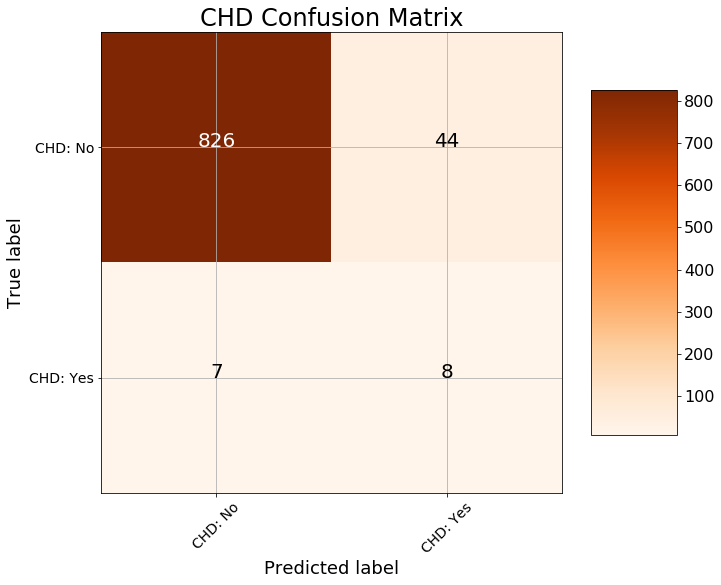

In [346]:
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm, classes = ['CHD: No', 'CHD: Yes'],
                      title = 'CHD Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

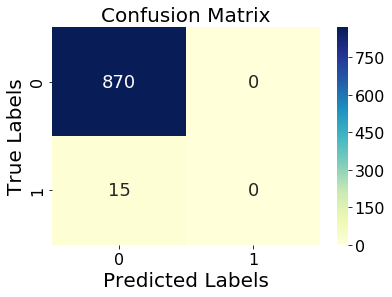

In [208]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     

cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, annot_kws={"size": 18}, fmt="d", cmap="YlGnBu")

ax.set_xlabel('Predicted Labels', fontsize = 20)
ax.set_ylabel('True Labels', fontsize = 20)
ax.set_title('Confusion Matrix', fontsize = 20)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Text(0.5, 1.0, 'Confusion Matrix')

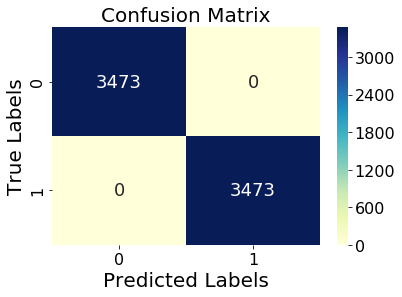

In [209]:
cm = confusion_matrix(y_train, rf_clf.predict(X_train))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, annot_kws={"size": 18}, fmt="d", cmap="YlGnBu")

ax.set_xlabel('Predicted Labels', fontsize = 20)
ax.set_ylabel('True Labels', fontsize = 20)
ax.set_title('Confusion Matrix', fontsize = 20)

**Feature Importance**

In [349]:
features = list(df_features.columns.values)


In [350]:
feature_importances = pd.DataFrame(rf_clf.feature_importances_,
                                   index = features,
                                   columns=['Importance']).sort_values('Importance', ascending=False)
feature_importances

,Importance
Doctor_told_you_reduce_salt,0.136003
Ever_told_high_cholesterol,0.123520
Ever_told_high_blood_pressure,0.109567
Age,0.079371
Smoked_at_least_100_cigarettes_in_life,0.073981
Doctor_told_you_exercise,0.066174
Doctor_told_you_reduce_fat_calories,0.064863
Doctor_told_you_have_diabetes,0.050747
Doctor_told_you_lose_weight,0.034840
Doctor_told_you_overweight,0.028372


In [347]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

Recall Baseline: 1.0 Test: 0.53 Train: 0.99
Precision Baseline: 0.02 Test: 0.15 Train: 0.96
Roc Baseline: 0.5 Test: 0.88 Train: 1.0


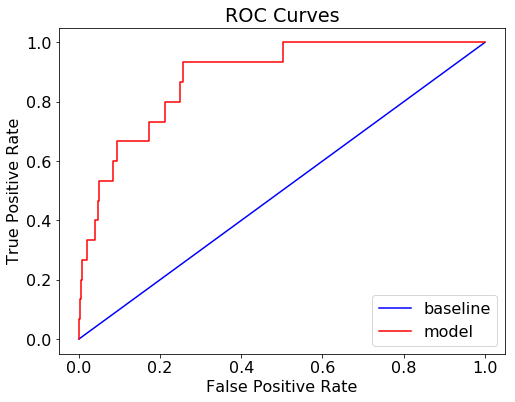

In [348]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

**Random Forest** (parameter tuning)

In [351]:
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 123)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, random_state=123)

# Fit 
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, ...9, 49, 49, 49, 49, 49, 49, 49, 49, 50], 'min_samples_split': [2, 5, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_

In [352]:
rs.best_params_

{'n_estimators': 134,
 'min_samples_split': 10,
 'max_leaf_nodes': 48,
 'max_features': 'auto',
 'max_depth': 18,
 'bootstrap': True}

In [353]:
best_model = rs.best_estimator_

In [354]:
train_rf_predictions = best_model.predict(X_train)
train_rf_probs = best_model.predict_proba(X_train)[:, 1]

rf_predictions = best_model.predict(X_test)
rf_probs = best_model.predict_proba(X_test)[:, 1]

In [357]:
y_pred = best_model.predict(X_test)

In [358]:

print('Accuracy Score:  ' + str(accuracy_score(y_test, y_pred)))
print('F1 Score:        ' + str(f1_score(y_test, y_pred,)))
print('Precision Score: ' + str(precision_score(y_test, y_pred,)))
print('Recall Score:    ' + str(recall_score(y_test, y_pred)) )
report = classification_report(y_test, y_pred)
print ('')
print (report)

Accuracy Score:  0.9819209039548022
F1 Score:        0.2
Precision Score: 0.4
Recall Score:    0.13333333333333333

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       870
         1.0       0.40      0.13      0.20        15

   micro avg       0.98      0.98      0.98       885
   macro avg       0.69      0.56      0.60       885
weighted avg       0.98      0.98      0.98       885



Recall Baseline: 1.0 Test: 0.13 Train: 0.99
Precision Baseline: 0.02 Test: 0.4 Train: 1.0
Roc Baseline: 0.5 Test: 0.87 Train: 1.0


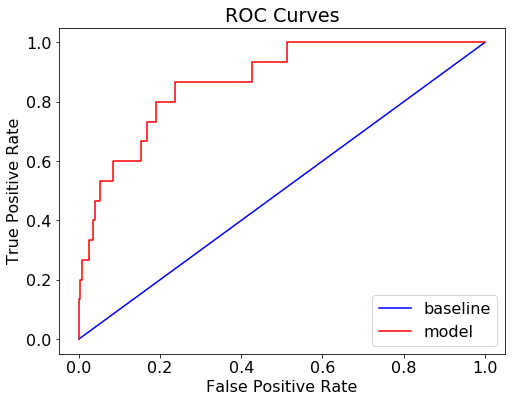

In [355]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

Confusion matrix, without normalization
[[867   3]
 [ 13   2]]


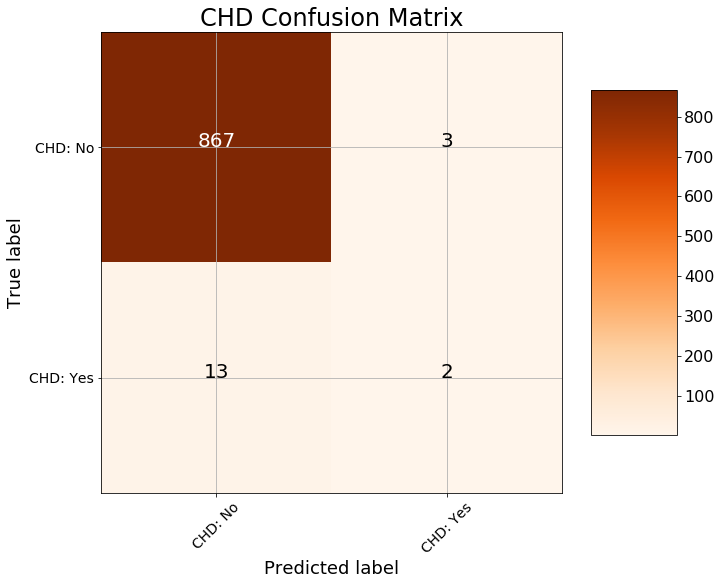

In [356]:
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm, classes = ['CHD: No', 'CHD: Yes'],
                      title = 'CHD Confusion Matrix')

**KNN**

In [24]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_features)


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
scaled_df_features = pd.DataFrame(scaled_df, columns = df_features.columns)
scaled_df_features.head()

,Age,Heart_Rate,Irregular_Pulse,Systolic_BP_Avg,Diastolic_BP_Avg,Weight_kg,Height_cm,BMI,Waist_cm,Avg_Num_Alcohol_Drink_a_Day,...,Family_Income_5.0,Family_Income_6.0,Family_Income_7.0,Family_Income_8.0,Family_Income_9.0,Family_Income_10.0,Family_Income_12.0,Family_Income_13.0,Family_Income_14.0,Family_Income_15.0
0,1.480049,0.235253,-0.122127,0.027259,-0.547959,0.553287,1.818065,-0.251833,0.108434,-0.787793,...,-0.251946,-0.343993,-0.314455,-0.305251,-0.260464,4.360456,-0.13998,-0.106929,-0.323063,-0.549922
1,0.800099,-0.117647,-0.122127,1.101718,1.306724,0.353847,0.474844,0.164677,0.520973,1.763392,...,-0.251946,-0.343993,-0.314455,-0.305251,-0.260464,-0.229334,-0.13998,-0.106929,-0.323063,-0.549922
2,1.026749,0.411703,-0.122127,0.729790,-0.129159,1.233195,-0.601784,1.775182,0.654442,-0.787793,...,-0.251946,-0.343993,-0.314455,-0.305251,-0.260464,4.360456,-0.13998,-0.106929,-0.323063,-0.549922
3,-0.030951,0.235253,-0.122127,-1.129851,-1.026586,-1.241671,-0.191640,-1.293108,-1.147385,-0.787793,...,-0.251946,-0.343993,3.180105,-0.305251,-0.260464,-0.229334,-0.13998,-0.106929,-0.323063,-0.549922
4,-1.541952,-0.646996,-0.122127,-0.675272,0.110154,-0.271668,-0.140372,-0.224066,-0.771246,2.783867,...,-0.251946,-0.343993,3.180105,-0.305251,-0.260464,-0.229334,-0.13998,-0.106929,-0.323063,-0.549922


In [28]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df_features, df_target, test_size=0.2)

In [29]:
sm = SMOTE()
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

In [30]:
clf1 = KNeighborsClassifier()
clf1.fit(X_train, y_train)
test_preds = clf1.predict(X_test)

In [33]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [34]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.0390625
Recall Score: 0.45454545454545453
Accuracy Score: 0.8542372881355932
F1 Score: 0.07194244604316546


In [35]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1

    print('Best K: {}'.format(best_k))
    print('Best Score: {}'.format(best_score))
    


In [36]:
find_best_k(X_train, y_train, X_test, y_test)

Best K: 13
Best Score: 0.08653846153846152


**Logistic Regression**

In [225]:
from sklearn.linear_model import LogisticRegression

In [226]:
logreg = LogisticRegression(fit_intercept=0, C=1e12)

In [227]:
model_log = logreg.fit(X_train, y_train)

In [228]:
y_hat_test = model_log.predict(X_test)

In [229]:
print(metrics.accuracy_score(y_test, y_hat_test))

0.8655367231638418


In [230]:
model_log.score(X_train, y_train)

0.9137633170169882

In [231]:
model_log.score(X_test, y_test)

0.8655367231638418

In [232]:
print('Accuracy Score:  ' + str(accuracy_score(y_test, y_hat_test)))
print('F1 Score:        ' + str(f1_score(y_test, y_hat_test)))
print('Precision Score: ' + str(precision_score(y_test, y_hat_test)))
print('Recall Score:    ' + str(recall_score(y_test, y_hat_test)) )
report = classification_report(y_test, y_hat_test)
print ('')
print (report)

Accuracy Score:  0.8655367231638418
F1 Score:        0.11851851851851852
Precision Score: 0.06666666666666667
Recall Score:    0.5333333333333333

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93       870
         1.0       0.07      0.53      0.12        15

   micro avg       0.87      0.87      0.87       885
   macro avg       0.53      0.70      0.52       885
weighted avg       0.98      0.87      0.91       885



Text(0.5, 1.0, 'Confusion Matrix')

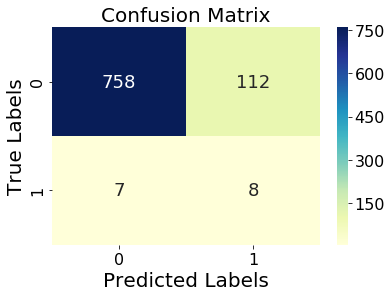

In [233]:
cm = confusion_matrix(y_test, y_hat_test)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, annot_kws={"size": 18}, fmt="d", cmap="YlGnBu")

ax.set_xlabel('Predicted Labels', fontsize = 20)
ax.set_ylabel('True Labels', fontsize = 20)
ax.set_title('Confusion Matrix', fontsize = 20)

Text(0.5, 1.0, 'Confusion Matrix')

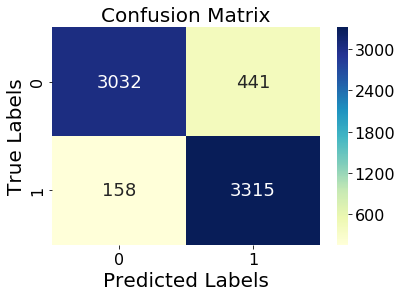

In [234]:
cm = confusion_matrix(y_train, model_log.predict(X_train))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, annot_kws={"size": 18}, fmt="d", cmap="YlGnBu")

ax.set_xlabel('Predicted Labels', fontsize = 20)
ax.set_ylabel('True Labels', fontsize = 20)
ax.set_title('Confusion Matrix', fontsize = 20)